In [1]:
import pandas as pd
import reverse_geocode
import matplotlib.pyplot as plt
import numpy as np

In [2]:
colNames = ['drop','year','artist_name','artist_id','artist_hotness','artist_familarity','artist_location','song_title','song_hotness','album_name','lat','long']

In [3]:
len(colNames)

12

# read the data with lat long information

In [4]:
songs_df = pd.read_csv('files/moreFeaturesLatLong.csv', index_col=False, encoding='iso-8859-1', header = None)

In [5]:
songs_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0,1995,Baka Beyond,ARE93YV1187B9937CC,0.391484,0.559823,Cameroon,Journey (Album Version),0.355286,The Meeting Pool,7.36529,12.34344
1,1,1993,The Fleetwoods,AROSQW61187FB5330B,0.397711,0.503821,"Olympia, WA",Ten Times Blue,0.310792,Come Softly To Me: The Very Best Of The Fleetw...,47.03922,-122.89143
2,2,2006,Joe Satriani,ARNZ70R1187B9A4824,0.620948,0.705876,"Westbury, Long Island, NY",It's So Good,0.693272,Super Colossal,NaN,NaN
3,3,1999,Middle Of The Road,AR0TAEM1187FB36C4B,0.392012,0.561766,NaN,Bonjour ca va,0.266955,MediaMarkt - Collection,NaN,NaN
4,4,2001,Nightwish,AR74Q3R1187B9B24C3,0.580345,0.801989,"Kitee, Finland",Over The Hills And Far Away,NaN,Highest Hopes-The Best Of Nightwish,NaN,NaN


In [6]:
songs_df.tail(20)

,0,1,2,3,4,5,6,7,8,9,10,11
433303,4236,2001,Something Corporate,AR4QXGK1187B98FABD,0.520569,0.771979,"Orange County, California, United States",If You C Jordan,NaN,Audioboxer,NaN,NaN
433304,4237,2009,Captain Planet,AR0KEBK11C8A421F77,0.468412,0.544325,NaN,Parkhaus,0.642327,Inselwissen,NaN,NaN
433305,4238,2007,Coronatus,ARHHIW21187FB5BD76,0.376075,0.560206,NaN,Interrotte Speranze,0.450762,Lux Noctis,NaN,NaN
433306,4239,2004,Tord Gustavsen_ Harald Johnsen_ Jarle Vespestad,AR8QJHN1187FB3616E,0.391942,0.637009,NaN,Curtains Aside,0.555318,The Ground,NaN,NaN
433307,4240,2004,Transmission0,AR9ZEEW1187B9B0666,0.381368,0.497783,NaN,Ether,NaN,0,NaN,NaN
433308,4241,2008,Stealing O'Neal,ARVLLHM11F4C83E203,0.392837,0.624455,NaN,Chin Up Baby,0.481694,Collidescope,NaN,NaN
433309,4242,2003,The Tyde,ARS7Q061187B991BCF,0.322400,0.558207,NaN,New D,0.332458,Twice,NaN,NaN
433310,4243,1997,Govi,ARYT62X1187FB5962F,0.392385,0.579400,"EUGENE, US",Your Lingering Touch,0.644979,Your Lingering Touch,44.04992,-123.08854
433311,4244,1998,Starflyer 59,ARH65291187B989DB5,0.537043,0.657696,NaN,Too Much Fun,0.427583,The Fashion Focus,NaN,NaN
433312,4245,2007,Hatesphere,ARLPWXD1187FB4CB6A,0.405598,0.647565,Copenhagen/Aarhus - Denmark,Feeding The Demons,0.501117,Serpent Smiles And Killer Eyes,55.67631,12.56935


In [7]:
songs_df.shape

(433323, 12)

In [8]:
songs_df.columns = colNames

In [9]:
songs_df.drop('drop', axis = 1, inplace=True)

# read the file with trackid information.

In [10]:
trackid_df = pd.read_csv('files/moreFeaturesTrackID.csv', index_col=False, encoding='iso-8859-1', header = None)

In [11]:
trackid_df.shape

(433323, 2)

In [12]:
colNames = ['drop','track_id']
trackid_df.columns = colNames
trackid_df.drop('drop', axis = 1, inplace=True)
trackid_df.shape

(433323, 1)

In [15]:
trackid_df.head()

,track_id
0,TRCCCRP128F147BEFA
1,TRCCCDI128F427CC1F
2,TRCCCMQ128F42AE752
3,TRCCCJT128F429FFF6
4,TRCCCAQ128E079937C


In [14]:
songs_df.insert(0, 'track_id', trackid_df['track_id'])
songs_df.head()

,track_id,year,artist_name,artist_id,artist_hotness,artist_familarity,artist_location,song_title,song_hotness,album_name,lat,long
0,TRCCCRP128F147BEFA,1995,Baka Beyond,ARE93YV1187B9937CC,0.391484,0.559823,Cameroon,Journey (Album Version),0.355286,The Meeting Pool,7.36529,12.34344
1,TRCCCDI128F427CC1F,1993,The Fleetwoods,AROSQW61187FB5330B,0.397711,0.503821,"Olympia, WA",Ten Times Blue,0.310792,Come Softly To Me: The Very Best Of The Fleetw...,47.03922,-122.89143
2,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,0.620948,0.705876,"Westbury, Long Island, NY",It's So Good,0.693272,Super Colossal,NaN,NaN
3,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,0.392012,0.561766,NaN,Bonjour ca va,0.266955,MediaMarkt - Collection,NaN,NaN
4,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,0.580345,0.801989,"Kitee, Finland",Over The Hills And Far Away,NaN,Highest Hopes-The Best Of Nightwish,NaN,NaN


In [16]:
songs_dropped = songs_df.dropna(subset=['lat','long'])

In [17]:
songs_dropped.reset_index(drop=True, inplace=True)

In [18]:
songs_dropped.ix[:,10:12].head(20)

,lat,long
0,7.36529,12.34344
1,47.03922,-122.89143
2,40.71455,-74.00712
3,42.37266,-74.09528
4,39.95227,-75.16237
5,52.09530,1.31388
6,51.55503,-0.17348
7,21.78660,82.79476
8,40.11727,-88.20449
9,29.59733,-90.71913


In [19]:
songs_dropped.tail()

,track_id,year,artist_name,artist_id,artist_hotness,artist_familarity,artist_location,song_title,song_hotness,album_name,lat,long
148722,TRYYHBA128F93129CB,2002,Terra Ambient,ARGASJY1187B99926D,0.336471,0.436523,Pennsylvania,Under Dirt X,0.304170,The Darker Space,40.99471,-77.60454
148723,TRYYYEE128F930BA5F,2003,The Cooper Temple Clause,ARUDU1L1187FB5073F,0.451805,0.753428,"Reading, England",A.I.M.,NaN,Kick Up The Fire_ And Let The Flames Break Loose,51.45238,-0.99603
148724,TRYYYCS128F930C271,1997,Govi,ARYT62X1187FB5962F,0.392385,0.579400,"EUGENE, US",Your Lingering Touch,0.644979,Your Lingering Touch,44.04992,-123.08854
148725,TRYYYAF128F930C01F,2007,Hatesphere,ARLPWXD1187FB4CB6A,0.405598,0.647565,Copenhagen/Aarhus - Denmark,Feeding The Demons,0.501117,Serpent Smiles And Killer Eyes,55.67631,12.56935
148726,TRYYYDU12903CF47ED,1996,Moonspell,AR4C6V01187FB3BAF4,0.499826,0.722571,Portugal,A Poisoned Gift,0.615328,Irreligious (re-issue + Bonus Tracks),39.55792,-7.84481


In [20]:
size = songs_dropped.shape[0]
size

148727

In [55]:
! pip install --user reverse_geocode

    100% |████████████████████████████████| 1.8MB 656kB/s eta 0:00:01
  Running setup.py install for reverse-geocode ... done


In [21]:
countries = []
for i in range(0, size):
    lat = songs_dropped.iloc[i]['lat']
    lon = songs_dropped.iloc[i]['long']
    l = list()
    l.append((lat,lon))
    res = reverse_geocode.search(l)
    countries.append(res[0]['country'])

In [22]:
country = pd.DataFrame(countries)
country.columns = ['country']
country.head()

,country
0,Cameroon
1,United States
2,United States
3,United States
4,United States


In [23]:
country.shape

(148727, 1)

In [24]:
data_withCountry_df = pd.concat([songs_dropped, country], axis=1)
data_withCountry_df.tail(20)

,track_id,year,artist_name,artist_id,artist_hotness,artist_familarity,artist_location,song_title,song_hotness,album_name,lat,long,country
148707,TRYYXRZ128F9331D61,2004,The Album Leaf,ARVIZ6L1187FB509A5,0.507750,0.763232,California,The Outer Banks,0.727529,In A Safe Place,37.27188,-119.27023,United States
148708,TRYYXBT128F932E725,1997,Echobelly,AROB7AO1187B9B4F00,0.400052,0.530436,"London, England",Iris Art,0.494490,Lustra,51.50632,-0.12714,United Kingdom
148709,TRYYXIC128F9322267,2006,The Golden Dogs,ARLPELY1187B9AEB73,0.350935,0.605365,"Toronto, ON",Construction Worker,0.513296,Big Eye Little Eye,43.64856,-79.38533,Canada
148710,TRYYXQD128F92EA615,2009,Mew,ARHRMYH1187B9A675B,0.520624,0.806534,"Copenhagen, Denmark",Swimmer's Chant,0.650377,No More Stories EP,55.74138,12.57885,Denmark
148711,TRYYXBF128F4290AC2,2004,City,AR02LLE1187B98CDE3,0.461785,0.724637,New Jersey,Wer weiss,0.000000,Silberstreif am Horizont,40.14323,-74.72671,United States
148712,TRYYXFI128F426FC34,1996,Pete Seeger,ARRDIHY1187FB3C1B3,0.423693,0.714050,"New York, NY",My Name Is Liza Kalvelage,NaN,Pete Seeger: A Link In The Chain,40.71455,-74.00712,United States
148713,TRYYXWB128F9334340,2004,Fastbacks,ARI8TPF1187B9B72B1,0.353093,0.488269,"Seattle, WA",We Tried,0.215080,Truth_ Corrosion And Sour Bisquits,47.60356,-122.32944,United States
148714,TRYYHFE128F42B072B,2006,The Locos,AR15DNC1187FB3E8DD,0.411720,0.590410,Vallecas,ResistirÃ©,0.530663,Jaula De Grillos,40.38308,-3.64184,Spain
148715,TRYYHAZ128F92DE8EA,1994,Robert Rich,ARS9SSI1187B997558,0.393952,0.567516,California,Animus,0.392009,Propagation,37.27188,-119.27023,United States
148716,TRYYHOD12903CE7911,2006,Tunng,ARKFJI71187FB55484,0.458829,0.689758,"London, England",Jenny Again,NaN,Remixes,51.50632,-0.12714,United Kingdom


In [25]:
res = pd.DataFrame(data_withCountry_df.groupby(by='country').count())
res = pd.DataFrame(res['track_id'])
res.reset_index(inplace=True)
res.columns = ['country','count']
res.sort_values(by='count', axis=0, ascending=False, inplace=True)
top_countries = res.head(10)
top_countries.head()

,country,count
103,United States,83531
102,United Kingdom,21795
18,Canada,7871
37,Germany,5669
90,Sweden,3951


In [26]:
np.ravel(top_countries['country'])

array(['United States', 'United Kingdom', 'Canada', 'Germany', 'Sweden',
       'France', 'Australia', 'Italy', 'Norway', 'Spain'], dtype=object)

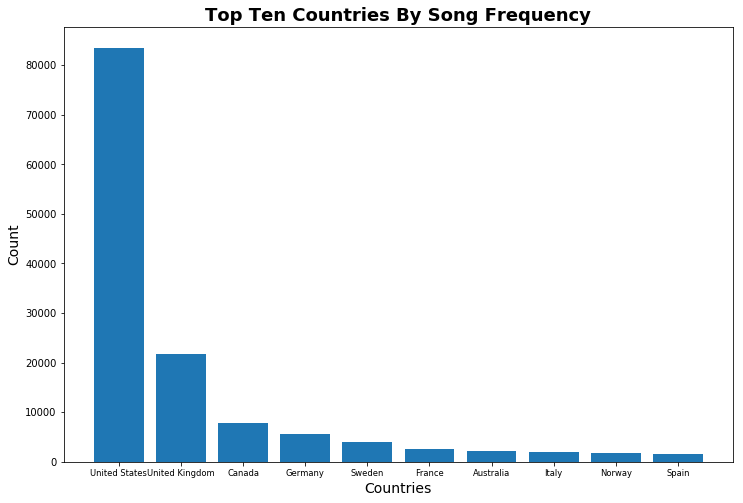

In [192]:
plt.figure(figsize = (12,8))
plt.bar(range(10), np.ravel(top_countries['count']), align='center')
plt.xticks(range(10), np.ravel(top_countries['country']), size='small')
plt.title('Top Ten Countries By Song Frequency',fontweight="bold", fontsize=18)
plt.xlabel('Countries', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.show()

In [193]:
res.head()

,country,count
103,United States,83531
102,United Kingdom,21795
18,Canada,7871
37,Germany,5669
90,Sweden,3951


# only select US samples

In [27]:
songs_unitesStates_df = data_withCountry_df.loc[data_withCountry_df['country'] == 'United States']
songs_unitesStates_df.tail()

,track_id,year,artist_name,artist_id,artist_hotness,artist_familarity,artist_location,song_title,song_hotness,album_name,lat,long,country
148718,TRYYHOC128F931104E,1999,David Ball,ARHKJET1187FB49757,0.349414,0.531609,"Rock Hill, SC",Going Someplace To Forget (Album Version),0.000000,Play,34.92402,-81.02668,United States
148719,TRYYHQZ128F4290BB8,1998,Nate Dogg,ARWAJKN1187FB362A1,0.457226,0.643647,"Los Angeles, CA",Never Too Late,0.579729,The Prodigal Son,34.05349,-118.24532,United States
148721,TRYYHQV128F1465349,2004,Bettye Swann,ARZO0421187FB5C01A,0.338900,0.530744,"Shreveport, LA",Words,0.445455,Bettye Swann,32.51461,-93.74727,United States
148722,TRYYHBA128F93129CB,2002,Terra Ambient,ARGASJY1187B99926D,0.336471,0.436523,Pennsylvania,Under Dirt X,0.304170,The Darker Space,40.99471,-77.60454,United States
148724,TRYYYCS128F930C271,1997,Govi,ARYT62X1187FB5962F,0.392385,0.579400,"EUGENE, US",Your Lingering Touch,0.644979,Your Lingering Touch,44.04992,-123.08854,United States


In [28]:
list_trackids = songs_unitesStates_df['track_id']
#list_trackids

In [29]:
songs_unitesStates_df.shape

(83531, 13)

In [30]:
colNames = ['year', 'artist_name', 'artist_id', 'song_title', 'song_beats_persecond', 'song_duration', 'song_end_fade_in', 'song_start_fade_out', 'song_key', 'song_loudness', 'song_loudness_max', 'song_loudness_min', 'song_loudness_med', 'song_loudness_time_max', 'song_loudness_time_min', 'song_loudness_time_med', 'song_mode', 'song_tempo', 'song_time_signature', 'pitch0', 'pitch1', 'pitch2', 'pitch3', 'pitch4', 'pitch5', 'pitch6', 'pitch7', 'pitch8', 'pitch9', 'pitch10', 'pitch11', 'pitch12', 'pitch13', 'pitch14', 'pitch15', 'pitch16', 'pitch17', 'pitch18', 'pitch19', 'pitch20', 'pitch21', 'pitch22', 'pitch23', 'pitch24', 'pitch25', 'pitch26', 'pitch27', 'pitch28', 'pitch29', 'pitch30', 'pitch31', 'pitch32', 'pitch33', 'pitch34', 'pitch35', 'pitch36', 'pitch37', 'pitch38', 'pitch39', 'pitch40', 'pitch41', 'pitch42', 'pitch43', 'pitch44', 'pitch45', 'pitch46', 'pitch47', 'pitch48', 'pitch49', 'pitch50', 'pitch51', 'pitch52', 'pitch53', 'pitch54', 'pitch55', 'pitch56', 'pitch57', 'pitch58', 'pitch59', 'pitch60', 'pitch61', 'pitch62', 'pitch63', 'pitch64', 'pitch65', 'pitch66', 'pitch67', 'pitch68', 'pitch69', 'pitch70', 'pitch71', 'pitch72', 'pitch73', 'pitch74', 'pitch75', 'pitch76', 'pitch77', 'pitch78', 'pitch79', 'pitch80', 'pitch81', 'pitch82', 'pitch83', 'pitch84', 'pitch85', 'pitch86', 'pitch87', 'pitch88', 'pitch89', 'timbre0', 'timbre1', 'timbre2', 'timbre3', 'timbre4', 'timbre5', 'timbre6', 'timbre7', 'timbre8', 'timbre9', 'timbre10', 'timbre11', 'timbre12', 'timbre13', 'timbre14', 'timbre15', 'timbre16', 'timbre17', 'timbre18', 'timbre19', 'timbre20', 'timbre21', 'timbre22', 'timbre23', 'timbre24', 'timbre25', 'timbre26', 'timbre27', 'timbre28', 'timbre29', 'timbre30', 'timbre31', 'timbre32', 'timbre33', 'timbre34', 'timbre35', 'timbre36', 'timbre37', 'timbre38', 'timbre39', 'timbre40', 'timbre41', 'timbre42', 'timbre43', 'timbre44', 'timbre45', 'timbre46', 'timbre47', 'timbre48', 'timbre49', 'timbre50', 'timbre51', 'timbre52', 'timbre53', 'timbre54', 'timbre55', 'timbre56', 'timbre57', 'timbre58', 'timbre59', 'timbre60', 'timbre61', 'timbre62', 'timbre63', 'timbre64', 'timbre65', 'timbre66', 'timbre67', 'timbre68', 'timbre69', 'timbre70', 'timbre71', 'timbre72', 'timbre73', 'timbre74', 'timbre75', 'timbre76', 'timbre77', 'timbre78', 'timbre79', 'timbre80', 'timbre81', 'timbre82', 'timbre83', 'timbre84', 'timbre85', 'timbre86', 'timbre87', 'timbre88', 'timbre89']

# read the file with all observations. Later will merge this file with the US sample

In [31]:
all_songs_df = pd.read_csv('write_clean.csv', index_col=False, encoding='iso-8859-1', header = None)
all_songs_df.columns = colNames
all_songs_df.insert(0, 'track_id', trackid_df['track_id'])
all_songs_df.shape

(433323, 200)

In [32]:
all_songs_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
0,TRCCCRP128F147BEFA,1995,Baka Beyond,ARE93YV1187B9937CC,Journey (Album Version),2.279004,368.14322,0.000,358.905,9,...,3.752557,7.258691,8.160899,-15.233542,-1.005168,-11.963544,3.219385,0.321612,6.035325,-5.073151
1,TRCCCDI128F427CC1F,1993,The Fleetwoods,AROSQW61187FB5330B,Ten Times Blue,1.429429,175.59465,0.374,160.142,5,...,17.223156,-11.112736,-20.088584,-2.014150,-23.744203,-14.320086,5.993278,1.540968,1.165962,14.946707
2,TRCCCMQ128F42AE752,2006,Joe Satriani,ARNZ70R1187B9A4824,It's So Good,1.389052,254.85016,0.113,238.939,7,...,19.697000,3.334592,-5.095906,-17.352149,-1.111426,-3.731800,18.999957,-1.012594,3.487135,2.075860
3,TRCCCJT128F429FFF6,1999,Middle Of The Road,AR0TAEM1187FB36C4B,Bonjour ca va,2.122026,188.49914,6.432,181.087,2,...,45.667773,5.851712,-16.402311,1.461625,12.524356,5.322093,3.174718,-3.725414,-2.448766,1.718200
4,TRCCCAQ128E079937C,2001,Nightwish,AR74Q3R1187B9B24C3,Over The Hills And Far Away,2.217180,300.38159,0.229,272.805,4,...,9.371832,-7.577228,-7.389075,-30.088617,16.377493,-2.032507,6.720626,4.166784,-1.135158,3.190866


In [33]:
final_df = all_songs_df.loc[all_songs_df['track_id'].isin(list_trackids)]
final_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
1,TRCCCDI128F427CC1F,1993,The Fleetwoods,AROSQW61187FB5330B,Ten Times Blue,1.429429,175.59465,0.374,160.142,5,...,17.223156,-11.112736,-20.088584,-2.014150,-23.744203,-14.320086,5.993278,1.540968,1.165962,14.946707
5,TRCCCSK128F92EE3B2,2008,Nickodemus,ARYPORX1187FB52FBD,Endangered Species,1.037855,276.53179,4.963,263.622,3,...,-31.297741,41.769493,19.034198,-0.967947,14.684154,-11.570598,6.591410,-4.883483,7.306786,16.625651
7,TRCCCPY128F92E7BFF,1994,Blossom Dearie,ARLPFWM1187FB4CCCB,I Won't Dance,2.578816,167.13098,0.000,161.007,4,...,-12.483800,-9.753899,-9.189235,10.408939,-33.070762,-1.510820,29.011320,15.473074,-6.748396,8.693491
11,TRCCCFC128F4251560,2003,Son House,ARGETJ81187B9B4F2F,Camp Hollers,1.548094,147.27791,0.467,144.910,6,...,62.799199,-10.830279,17.745049,29.286832,-29.923243,15.112445,-30.330752,12.403728,-10.920086,-10.775659
29,TRCCZFB12903CE4E2C,1995,Braid,AR8C70A1187B9B718F,Brass Knuckle Sandwich,1.552643,213.18485,0.270,208.631,1,...,31.214052,9.599196,-38.058341,-17.472237,-2.703884,2.229350,-0.704884,4.813442,2.489843,-7.730613


In [34]:
final_df.shape

(83531, 200)

In [35]:
final_df.to_csv('us_trackid.csv', header=True,index=True, encoding = 'iso-8859-1')

In [204]:
import sqlite3
engine = sqlite3.connect('USDB')
final_df.to_sql('songs', engine, if_exists='replace', index = False)

# only read UK samples

In [23]:
songs_unitedKingdom_df = data_withCountry_df.loc[data_withCountry_df['country'] == 'United Kingdom']
songs_unitedKingdom_df.tail()

,track_id,year,artist_name,artist_id,artist_hotness,artist_familarity,artist_location,song_title,song_hotness,album_name,lat,long,country
148706,433245,1996,Shed Seven,ARVHSJ11187FB4BA72,0.461284,0.626808,"York, England",Lies,0.439202,Where Have You Been Tonight?,53.95333,-1.08342,United Kingdom
148708,433247,1997,Echobelly,AROB7AO1187B9B4F00,0.400052,0.530436,"London, England",Iris Art,0.494490,Lustra,51.50632,-0.12714,United Kingdom
148716,433282,2006,Tunng,ARKFJI71187FB55484,0.458829,0.689758,"London, England",Jenny Again,NaN,Remixes,51.50632,-0.12714,United Kingdom
148720,433290,1991,Alison Moyet,AR6DSDG1187B98FA86,0.498569,0.635507,"Basildon, Essex, England",Never Too Late,0.413626,Hoodoo,51.57198,0.46694,United Kingdom
148723,433301,2003,The Cooper Temple Clause,ARUDU1L1187FB5073F,0.451805,0.753428,"Reading, England",A.I.M.,NaN,Kick Up The Fire_ And Let The Flames Break Loose,51.45238,-0.99603,United Kingdom


In [26]:
colNames = ['year', 'artist_name', 'artist_id', 'song_title', 'song_beats_persecond', 'song_duration', 'song_end_fade_in', 'song_start_fade_out', 'song_key', 'song_loudness', 'song_loudness_max', 'song_loudness_min', 'song_loudness_med', 'song_loudness_time_max', 'song_loudness_time_min', 'song_loudness_time_med', 'song_mode', 'song_tempo', 'song_time_signature', 'pitch0', 'pitch1', 'pitch2', 'pitch3', 'pitch4', 'pitch5', 'pitch6', 'pitch7', 'pitch8', 'pitch9', 'pitch10', 'pitch11', 'pitch12', 'pitch13', 'pitch14', 'pitch15', 'pitch16', 'pitch17', 'pitch18', 'pitch19', 'pitch20', 'pitch21', 'pitch22', 'pitch23', 'pitch24', 'pitch25', 'pitch26', 'pitch27', 'pitch28', 'pitch29', 'pitch30', 'pitch31', 'pitch32', 'pitch33', 'pitch34', 'pitch35', 'pitch36', 'pitch37', 'pitch38', 'pitch39', 'pitch40', 'pitch41', 'pitch42', 'pitch43', 'pitch44', 'pitch45', 'pitch46', 'pitch47', 'pitch48', 'pitch49', 'pitch50', 'pitch51', 'pitch52', 'pitch53', 'pitch54', 'pitch55', 'pitch56', 'pitch57', 'pitch58', 'pitch59', 'pitch60', 'pitch61', 'pitch62', 'pitch63', 'pitch64', 'pitch65', 'pitch66', 'pitch67', 'pitch68', 'pitch69', 'pitch70', 'pitch71', 'pitch72', 'pitch73', 'pitch74', 'pitch75', 'pitch76', 'pitch77', 'pitch78', 'pitch79', 'pitch80', 'pitch81', 'pitch82', 'pitch83', 'pitch84', 'pitch85', 'pitch86', 'pitch87', 'pitch88', 'pitch89', 'timbre0', 'timbre1', 'timbre2', 'timbre3', 'timbre4', 'timbre5', 'timbre6', 'timbre7', 'timbre8', 'timbre9', 'timbre10', 'timbre11', 'timbre12', 'timbre13', 'timbre14', 'timbre15', 'timbre16', 'timbre17', 'timbre18', 'timbre19', 'timbre20', 'timbre21', 'timbre22', 'timbre23', 'timbre24', 'timbre25', 'timbre26', 'timbre27', 'timbre28', 'timbre29', 'timbre30', 'timbre31', 'timbre32', 'timbre33', 'timbre34', 'timbre35', 'timbre36', 'timbre37', 'timbre38', 'timbre39', 'timbre40', 'timbre41', 'timbre42', 'timbre43', 'timbre44', 'timbre45', 'timbre46', 'timbre47', 'timbre48', 'timbre49', 'timbre50', 'timbre51', 'timbre52', 'timbre53', 'timbre54', 'timbre55', 'timbre56', 'timbre57', 'timbre58', 'timbre59', 'timbre60', 'timbre61', 'timbre62', 'timbre63', 'timbre64', 'timbre65', 'timbre66', 'timbre67', 'timbre68', 'timbre69', 'timbre70', 'timbre71', 'timbre72', 'timbre73', 'timbre74', 'timbre75', 'timbre76', 'timbre77', 'timbre78', 'timbre79', 'timbre80', 'timbre81', 'timbre82', 'timbre83', 'timbre84', 'timbre85', 'timbre86', 'timbre87', 'timbre88', 'timbre89']

In [27]:
all_songs_df = pd.read_csv('write_clean.csv', index_col=False, encoding='iso-8859-1', header = None)
all_songs_df.columns = colNames
all_songs_df.reset_index(inplace=True)
all_songs_df = all_songs_df.rename(columns={'index': 'track_id'})
all_songs_df.shape

(433323, 200)

In [31]:
list_trackids = songs_unitedKingdom_df['track_id']

In [32]:
final_df = all_songs_df.loc[all_songs_df['track_id'].isin(list_trackids)]
final_df.head()

,track_id,year,artist_name,artist_id,song_title,song_beats_persecond,song_duration,song_end_fade_in,song_start_fade_out,song_key,...,timbre80,timbre81,timbre82,timbre83,timbre84,timbre85,timbre86,timbre87,timbre88,timbre89
20,20,1992,Brian Eno,ART4EPR1187FB38772,Cavallino (Album Version),1.111011,185.41669,4.296,163.648,8,...,-21.289595,-32.485499,19.880439,-31.951041,3.976650,-1.787708,23.098894,0.927658,-4.765317,-22.096232
24,24,1999,Marianne Faithfull,AR9FKRD1187B9B73D4,Great Expectations,1.238377,193.80200,0.421,183.281,11,...,-4.877986,-13.654021,-14.257267,-20.140851,5.335119,-9.126235,9.746358,0.141406,-2.212238,-15.133671
32,32,2009,Evile,AR0BO8O1187B992CC1,Now Demolition,3.305942,346.04363,0.131,337.665,8,...,16.783793,-5.554045,-58.653289,-14.687884,9.929577,-4.453563,16.295146,7.700201,-2.534092,8.037090
33,33,2005,Maximo Park,ARD8ODS1187FB4ADFA,I Want You To Stay,1.276312,249.15546,0.225,240.483,10,...,28.486406,-4.195530,-6.153938,-4.244972,-0.846395,0.012447,-9.467312,-10.245099,-1.106977,11.529004
67,67,2001,Orbital,ARD5K161187B9AC784,Pay Per View,1.449611,311.11791,2.531,307.049,11,...,-44.505398,29.413865,20.214165,-19.926796,16.265797,-18.150369,-17.480383,-1.115614,6.723813,5.454545


In [33]:
final_df.shape

(21795, 200)

In [34]:
import sqlite3
engine = sqlite3.connect('UKDB')
final_df.to_sql('songs', engine, if_exists='replace', index = False)